# ML1 Classification Project - `drugs` dataset

Completed by:
- Vadym Dudarenko (Student ID 444820)
- Vladimir Shargin (Student ID 437981)

## Dataset description

- id – unique observation identifier
- age – age group of the person with the following levels: 18-24, 25-34, 35-44, 45-54, 55-64, 65+
- gender – gender of the person with the following levels: female, male
- education – education level of the person with the following levels: Left school before 16 years, Left school at 16 years, Left school at 17 years, Left school at 18 years, Some college or university, no certificate or degree, Professional certificate/ diploma, University degree, Masters degree, Doctorate degree
- country – country of current residence of the person with the following levels: Australia, Canada, New Zealand, Ireland, UK, USA, Other
- ethnicity – ethnicity of the person with the following levels: Asian, Black, Mixed-Black/Asian, Mixed-White/Asian, Mixed-White/Black, White, Other
- personality_neuroticism – assessment of neuroticism of the person based on psychological tests (0-100)
- personality_extraversion – assessment of extraversion of the person based on psychological tests (0-100)
- personality_openness – assessment of openness to experience of the person based on psychological tests (0-100)
- personality_agreeableness – assessment of agreeableness of the person based on psychological tests (0-100)
- personality_conscientiousness – assessment of conscientiousness of the person based on psychological tests (0-100)
- personality_impulsiveness – assessment of impulsiveness of the person based on psychological tests (0-100)
- personality_sensation – assessment of sensation of the person based on psychological tests (0-100)
- consumption_alcohol – declared consumption of alcohol with the following levels: never used, used over a decade ago, used in last decade, used in last year, used in last month, used in last week, used in last day
- consumption_amphetamines – declared consumption of amphetamines with the following levels: never used, used over a decade ago, used in last decade, used in last year, used in last month, used in last week, used in last day
- consumption_caffeine – declared consumption of caffeine with the following levels: never used, used over a decade ago, used in last decade, used in last year, used in last month, used in last week, used in last day
- consumption_cannabis – declared consumption of cannabis with the following levels: never used, used over a decade ago, used in last decade, used in last year, used in last month, used in last week, used in last day
- consumption_chocolate – declared consumption of chocolate with the following levels: never used, used over a decade ago, used in last decade, used in last year, used in last month, used in last week, used in last day
- consumption_mushrooms – declared consumption of magic mushrooms with the following levels: never used, used over a decade ago, used in last decade, used in last year, used in last month, used in last week, used in last day
- consumption_nicotine – declared consumption of nicotine with the following levels: never used, used over a decade ago, used in last decade, used in last year, used in last month, used in last week, used in last day
- consumption_cocaine_last_month – declared consumption of cocaine in the last month with the following levels: No, Yes (**outcome variable**, only in the training sample)

## Library imports

In [8]:
import pandas as pd

import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier

import catboost

import seaborn as sns

import matplotlib.pyplot as plt

In [9]:
def display_diagnostics(y_true, y_pred):
    print(f'Balanced accuracy score: {balanced_accuracy_score(y_true, y_pred)}')

    print(classification_report(y_true, y_pred))

    ax = plt.subplot()

    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='g', ax=ax)

    ax.set_title('Confusion matrix')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

    plt.show()

## Reading data

In [10]:
drugs_df = pd.read_csv('data/drugs_train.csv')

In [11]:
drugs_df.head()

,id,age,gender,education,country,ethnicity,personality_neuroticism,personality_extraversion,personality_openness,personality_agreeableness,...,personality_impulsiveness,personality_sensation,consumption_alcohol,consumption_amphetamines,consumption_caffeine,consumption_cannabis,consumption_chocolate,consumption_mushrooms,consumption_nicotine,consumption_cocaine_last_month
0,train_0001,45-54,male,Masters degree,USA,Mixed-Black/Asian,57.6,57.3,50.1,47.8,...,42.8,22.4,used in last week,used over a decade ago,used in last day,used in last week,used in last day,never used,used in last week,No
1,train_0002,25-34,male,University degree,USA,Mixed-Black/Asian,47.8,67.0,45.7,47.8,...,33.8,30.8,used in last week,never used,used in last week,never used,used in last day,never used,never used,No
2,train_0003,18-24,female,University degree,USA,Mixed-Black/Asian,57.6,43.3,55.3,45.6,...,63.0,62.0,used in last month,never used,used in last day,used in last week,used in last week,used in last year,used in last month,No
3,train_0004,25-34,female,Masters degree,USA,Mixed-Black/Asian,71.8,31.2,43.6,56.3,...,63.0,71.1,used in last day,never used,used in last day,used in last decade,used in last day,never used,used in last decade,No
4,train_0005,18-24,male,"Some college or university, no certificate or ...",Australia,Mixed-Black/Asian,56.1,62.3,70.2,66.1,...,50.4,62.0,used in last week,never used,used in last month,used in last month,used in last day,used in last year,used in last month,No


No missing values in the data:

In [12]:
drugs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1500 non-null   object 
 1   age                             1500 non-null   object 
 2   gender                          1500 non-null   object 
 3   education                       1500 non-null   object 
 4   country                         1500 non-null   object 
 5   ethnicity                       1500 non-null   object 
 6   personality_neuroticism         1500 non-null   float64
 7   personality_extraversion        1500 non-null   float64
 8   personality_openness            1500 non-null   float64
 9   personality_agreeableness       1500 non-null   float64
 10  personality_conscientiousness   1500 non-null   float64
 11  personality_impulsiveness       1500 non-null   float64
 12  personality_sensation           15

## EDA

### Numeric features (personality)

All numeric values are within 0-100 range, no outliers

In [13]:
drugs_df.describe()

,personality_neuroticism,personality_extraversion,personality_openness,personality_agreeableness,personality_conscientiousness,personality_impulsiveness,personality_sensation
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,51.507267,50.053667,53.108667,49.966000,49.998800,46.972200,52.316333
std,14.958815,15.200954,16.049880,14.340301,14.571548,17.361892,23.686221
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.300000,39.400000,41.400000,41.200000,40.600000,33.800000,38.800000
50%,52.000000,50.100000,52.700000,49.800000,49.900000,42.800000,54.000000
75%,60.800000,59.700000,64.700000,58.500000,58.400000,56.500000,71.100000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


### Gender

Gender distribution is uniform in the provided dataset (50% male to 50% female)

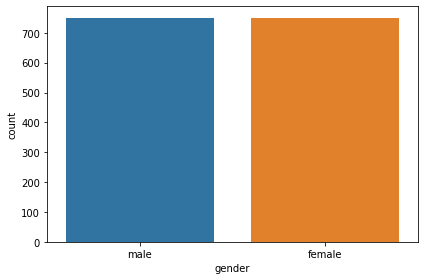

In [14]:
sns.countplot(x=drugs_df['gender'], orient='h')

plt.tight_layout()

### Ethnicity

Mixed-Black/Asian people are disproportionately overrepresented in the dataset (91% of the observations belong to this class)

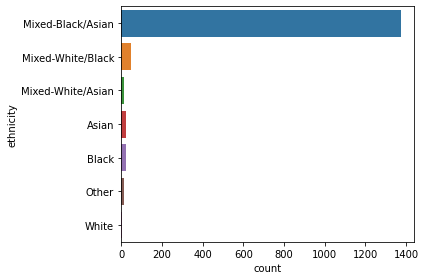

In [15]:
sns.countplot(y=drugs_df['ethnicity'], orient='h')

plt.tight_layout()

In [16]:
drugs_df['ethnicity'].value_counts(normalize=True) * 100

Mixed-Black/Asian    91.466667
Mixed-White/Black     3.133333
Asian                 1.666667
Black                 1.466667
Other                 1.066667
Mixed-White/Asian     1.000000
White                 0.200000
Name: ethnicity, dtype: float64

### Country

Provided data mostly focuses on USA/Australia

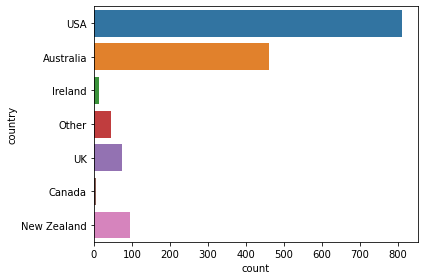

In [17]:
sns.countplot(y=drugs_df['country'], orient='h')

plt.tight_layout()

In [18]:
drugs_df['country'].value_counts(normalize=True)

USA            0.540667
Australia      0.306667
New Zealand    0.062667
UK             0.048667
Other          0.029333
Ireland        0.008667
Canada         0.003333
Name: country, dtype: float64

### Age

Younger age groups are more represented in the data:

In [19]:
age_order = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

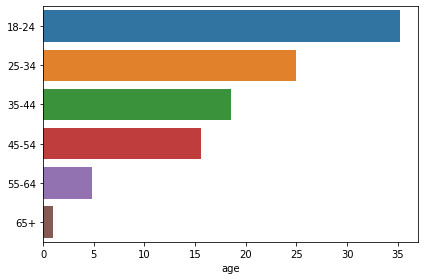

In [20]:
sns.barplot(x=drugs_df['age'].value_counts(normalize=True)*100, y=drugs_df['age'].value_counts(normalize=True).index, orient='h', order=age_order)

plt.tight_layout()

### 

### Substance consumption

In [21]:
consumption_columns = ['consumption_alcohol',
                       'consumption_amphetamines', 'consumption_caffeine',
                       'consumption_cannabis', 'consumption_chocolate',
                       'consumption_mushrooms', 'consumption_nicotine']

consumption_order = ['never used',
                     'used over a decade ago',
                     'used in last decade',
                     'used in last year',
                     'used in last month',
                     'used in last week',
                     'used in last day']

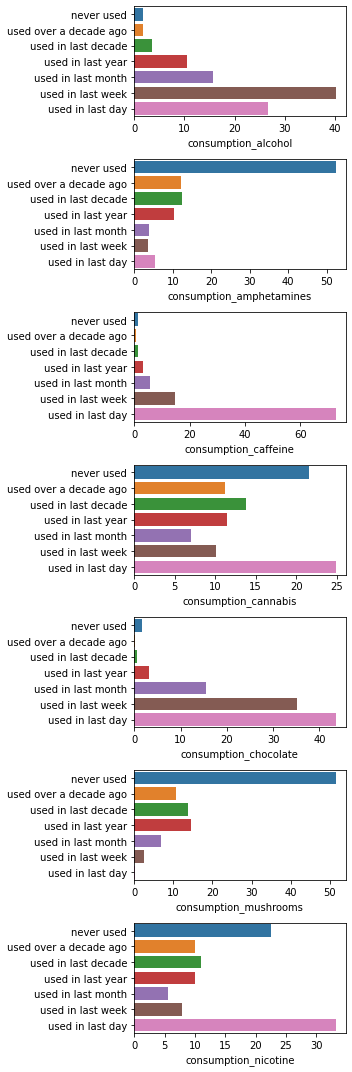

In [22]:
fig, ax = plt.subplots(len(consumption_columns), 1, figsize=(5, 15))

for i, column in enumerate(consumption_columns):
    sns.barplot(x=drugs_df[column].value_counts(normalize=True)*100, y=drugs_df[column].value_counts(normalize=True).index, orient='h', order=consumption_order, ax=ax[i])

plt.tight_layout()

### Education

In [23]:
education_order = ['Left school before 16 years',
                   'Left school at 16 years',
                   'Left school at 17 years',
                   'Left school at 18 years',
                   'Some college or university, no certificate or degree',
                   'Professional certificate/ diploma',
                   'University degree',
                   'Masters degree',
                   'Doctorate degree']

We're dealing with a diverse range of people with various educational backgroud, two most frequent education levels are `Some college or university, no certificate or degree` and `University degree`, constituting 52% of the sample.

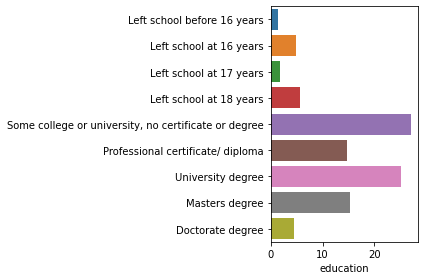

In [24]:
sns.barplot(x=drugs_df['education'].value_counts(normalize=True)*100, y=drugs_df['education'].value_counts(normalize=True).index, orient='h', order=education_order)

plt.tight_layout()

## Feature engineering

In [25]:
def feature_engineering(df: pd.DataFrame) -> pd.DataFrame:
    # adding a new feature to track observations where the person has never consumed *illicit* drugs
    df = df.assign(no_illicit_drugs=((df[['consumption_amphetamines', 'consumption_cannabis', 'consumption_mushrooms']] == 'never used').sum(axis=1) == 3).astype(int))

    # adding features to track number of substances (excluding chocolate and caffeine) used in different periods
  
    periods = [('used in last day', 'no_of_substances_last_day'),
               ('used in last week', 'no_of_substances_last_week'),
               ('used in last month', 'no_of_substances_last_month'),
               ('used in last year', 'no_of_substances_last_year'),
               ('used in last decade', 'no_of_substances_last_decade'),
               ('used over a decade ago', 'no_of_substances_decade_ago')]

    for period, column_name in periods:
        df = df.assign(**{column_name: (df[['consumption_alcohol',
                'consumption_amphetamines', 
                'consumption_cannabis',
                'consumption_mushrooms', 'consumption_nicotine']] == period).sum(axis=1)})

    return df

In [26]:
drugs_df = feature_engineering(drugs_df)

In [27]:
drugs_df.head()

,id,age,gender,education,country,ethnicity,personality_neuroticism,personality_extraversion,personality_openness,personality_agreeableness,...,consumption_mushrooms,consumption_nicotine,consumption_cocaine_last_month,no_illicit_drugs,no_of_substances_last_day,no_of_substances_last_week,no_of_substances_last_month,no_of_substances_last_year,no_of_substances_last_decade,no_of_substances_decade_ago
0,train_0001,45-54,male,Masters degree,USA,Mixed-Black/Asian,57.6,57.3,50.1,47.8,...,never used,used in last week,No,0,0,3,0,0,0,1
1,train_0002,25-34,male,University degree,USA,Mixed-Black/Asian,47.8,67.0,45.7,47.8,...,never used,never used,No,1,0,1,0,0,0,0
2,train_0003,18-24,female,University degree,USA,Mixed-Black/Asian,57.6,43.3,55.3,45.6,...,used in last year,used in last month,No,0,0,1,2,1,0,0
3,train_0004,25-34,female,Masters degree,USA,Mixed-Black/Asian,71.8,31.2,43.6,56.3,...,never used,used in last decade,No,0,1,0,0,0,2,0
4,train_0005,18-24,male,"Some college or university, no certificate or ...",Australia,Mixed-Black/Asian,56.1,62.3,70.2,66.1,...,used in last year,used in last month,No,0,0,1,2,1,0,0


## Data cleaning

The data is mostly clean (there are no outliers or missing values), but there are two minor things to be done:

1) We can safely drop the column `id`, it doesn't have any use for modeling
2) Target (`No`/`Yes`) should be replaced with `0`/`1`, as required by sklearn algorithm implementations
3) There is order to age, education and consumption and we can encode them as ordinals

In [28]:
def clean_df(df: pd.DataFrame, train_data:bool=True) -> pd.DataFrame:
    df = df.drop('id', axis=1)
    if train_data:
        df['consumption_cocaine_last_month'] = df['consumption_cocaine_last_month'].replace({'No': 0, 'Yes': 1})
    df['age'] = df['age'].apply(lambda e: age_order.index(e))
    df['education'] = df['education'].apply(lambda e: education_order.index(e))

    for consumption_column in consumption_columns:
        df[consumption_column] = df[consumption_column].apply(lambda e: consumption_order.index(e))
    
    return df

In [29]:
drugs_df = clean_df(drugs_df)

In [30]:
drugs_df.head()

,age,gender,education,country,ethnicity,personality_neuroticism,personality_extraversion,personality_openness,personality_agreeableness,personality_conscientiousness,...,consumption_mushrooms,consumption_nicotine,consumption_cocaine_last_month,no_illicit_drugs,no_of_substances_last_day,no_of_substances_last_week,no_of_substances_last_month,no_of_substances_last_year,no_of_substances_last_decade,no_of_substances_decade_ago
0,3,male,7,USA,Mixed-Black/Asian,57.6,57.3,50.1,47.8,53.7,...,0,5,0,0,0,3,0,0,0,1
1,1,male,6,USA,Mixed-Black/Asian,47.8,67.0,45.7,47.8,56.0,...,0,0,0,1,0,1,0,0,0,0
2,0,female,6,USA,Mixed-Black/Asian,57.6,43.3,55.3,45.6,49.9,...,3,4,0,0,0,1,2,1,0,0
3,1,female,7,USA,Mixed-Black/Asian,71.8,31.2,43.6,56.3,31.8,...,0,2,0,0,1,0,0,0,2,0
4,0,male,4,Australia,Mixed-Black/Asian,56.1,62.3,70.2,66.1,42.4,...,3,4,0,0,0,1,2,1,0,0


## General remarks

All models follow the same pipeline:

1) Split the dataset into training/test sets (70/30 split)
2) Preprocess the data if needed (categorical feature encoding, numeric feature scaling)
3) Fine-tune hyperparameters for the models using grid search with 3-fold cross-validation (3 is chosen insted of the default 5 because of limited dataset size)
4) Model is retrained on the whole training set using the best hyperparameters obtained using grid search
5) Balanced accuracy is compared on the training and test sets to check for overfitting

The best model is chosen by balanced accuracy (higher is better) on the test set

## Dataset splitting

In [31]:
cat_features = ['gender', 'country', 'ethnicity']

num_features = ['personality_neuroticism', 'personality_extraversion',
                 'personality_openness', 'personality_agreeableness',
                 'personality_conscientiousness', 'personality_impulsiveness',
                 'personality_sensation', 'no_illicit_drugs', 'no_of_substances_last_day', 'no_of_substances_last_week',
                 'no_of_substances_last_month', 'no_of_substances_last_year',
                 'no_of_substances_last_decade', 'no_of_substances_decade_ago']

ordinal_features = ['age', 'education', 'consumption_alcohol',
                    'consumption_amphetamines', 'consumption_caffeine',
                    'consumption_cannabis', 'consumption_chocolate',
                    'consumption_mushrooms', 'consumption_nicotine']

target = 'consumption_cocaine_last_month'

In [32]:
X = drugs_df[cat_features + num_features + ordinal_features]
y = drugs_df[target]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.7)

## Baseline

A classifier predicting the majority class for all observations will have a 0.5 balanced accuracy score, this is our starting point and the result which we seek to improve:

In [34]:
dummy_classifier = DummyClassifier()
dummy_classifier.fit(X_train, y_train)

balanced_accuracy_score(y_train, dummy_classifier.predict(X_train))

0.5

Balanced accuracy score: 0.5
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       961
           1       0.00      0.00      0.00        89

    accuracy                           0.92      1050
   macro avg       0.46      0.50      0.48      1050
weighted avg       0.84      0.92      0.87      1050



c:\Users\vladimir.shargin\Anaconda3\envs\ml1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vladimir.shargin\Anaconda3\envs\ml1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\vladimir.shargin\Anaconda3\envs\ml1\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

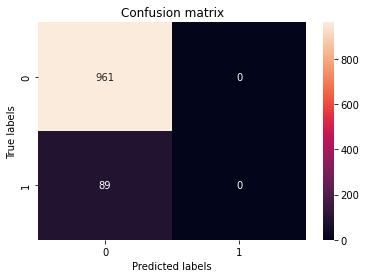

In [35]:
display_diagnostics(y_train, dummy_classifier.predict(X_train))

## Logistic regression

Logistic regression is a natural and classic choice for classification tasks

We'll adjust two hyperparameters to find the best model:
- Regularisation penalty term (L1 or L2) (`penalty`)
- Regularisation strength (`C`)

In [36]:
ohe_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')
scaler = MinMaxScaler()
transformers = ColumnTransformer([('categorical', ohe_transformer, cat_features),
                                  ('numeric', scaler, num_features)], remainder='passthrough')
logreg_pipeline = Pipeline(steps=[('transform', transformers),
                                  ('logreg', LogisticRegression(solver='liblinear', class_weight='balanced'))])

In [37]:
logreg_param_grid = {'logreg__penalty' : ['l1', 'l2'],
                     'logreg__C' : np.logspace(-4, 4, 20)}

In [38]:
logreg_search = GridSearchCV(logreg_pipeline, logreg_param_grid, scoring='balanced_accuracy', cv=3)

In [39]:
logreg_search.fit(X_train, y_train)

c:\Users\vladimir.shargin\Anaconda3\envs\ml1\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('categorical',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['gender',
                                                                          'country',
                                                                          'ethnicity']),
                                                                        ('numeric',
                                                                         MinMaxScaler(),
                                                                         ['personality_neuroticism',
                                                                          'personality_extraversion',
                                                                          'personality_openness',
                                                                          'personality_agreeableness',
                                                                          'pers...
             param_grid={'logreg__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'logreg__penalty': ['l1', 'l2']},
             scoring='balanced_accuracy')

In [40]:
logreg_search.best_estimator_

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'country',
                                                   'ethnicity']),
                                                 ('numeric', MinMaxScaler(),
                                                  ['personality_neuroticism',
                                                   'personality_extraversion',
                                                   'personality_openness',
                                                   'personality_agreeableness',
                                                   'personality_conscientiousness',
                                                   'personality_impulsiveness',
                                                   'personality_sensation',
                                                   'no_illicit_drugs',
                                                   'no_of_substances_last_day',
                                                   'no_of_substances_last_week',
                                                   'no_of_substances_last_month',
                                                   'no_of_substances_last_year',
                                                   'no_of_substances_last_decade',
                                                   'no_of_substances_decade_ago'])])),
                ('logreg',
                 LogisticRegression(C=0.012742749857031334,
                                    class_weight='balanced',
                                    solver='liblinear'))])

Balanced accuracy score: 0.7571466987805306
              precision    recall  f1-score   support

           0       0.98      0.69      0.81       961
           1       0.20      0.82      0.32        89

    accuracy                           0.70      1050
   macro avg       0.59      0.76      0.57      1050
weighted avg       0.91      0.70      0.77      1050



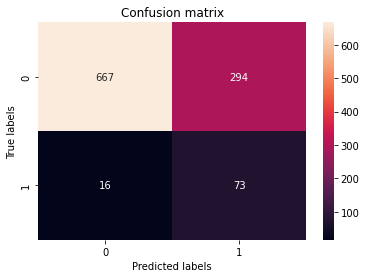

In [41]:
display_diagnostics(y_train, logreg_search.predict(X_train))

Balanced accuracy score: 0.7491057741440981
              precision    recall  f1-score   support

           0       0.97      0.71      0.82       412
           1       0.20      0.79      0.32        38

    accuracy                           0.72       450
   macro avg       0.59      0.75      0.57       450
weighted avg       0.91      0.72      0.78       450



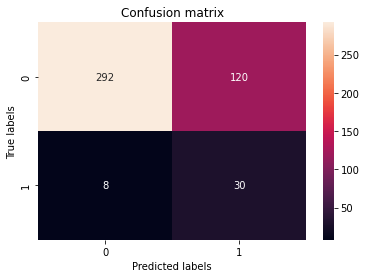

In [42]:
display_diagnostics(y_test, (logreg_search.predict(X_test)))

## SVM

Another machine learning algorithm that can be applied to classification are Support Vector Machines (SVM)

We'll use grid search to find the best model hyperparameters, adjusting the following:
- Regularisation strength (`C`)
- Kernels `linear`, `rbf`, `poly`, `sigmoid` (`kernel`)
- Kernel coefficient for `rbf`, `poly`, `sigmoid` kernels (`gamma`)

In [43]:
ohe_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')
scaler = MinMaxScaler()
transformers = ColumnTransformer([('categorical', ohe_transformer, cat_features),
                                  ('numeric', scaler, num_features)], remainder='passthrough')
svm_pipeline = Pipeline(steps=[('transform', transformers),
                                  ('svm', SVC(class_weight='balanced'))])

In [44]:
svm_param_grid = {'svm__C': [0.1,1, 10, 100], 'svm__gamma': [1,0.1,0.01,0.001],'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

In [45]:
svm_search = GridSearchCV(svm_pipeline, svm_param_grid, scoring='balanced_accuracy', cv=3)

In [46]:
svm_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('categorical',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['gender',
                                                                          'country',
                                                                          'ethnicity']),
                                                                        ('numeric',
                                                                         MinMaxScaler(),
                                                                         ['personality_neuroticism',
                                                                          'personality_extraversion',
                                                                          'personality_openness',
                                                                          'personality_agreeableness',
                                                                          'pers...
                                                                          'no_of_substances_last_day',
                                                                          'no_of_substances_last_week',
                                                                          'no_of_substances_last_month',
                                                                          'no_of_substances_last_year',
                                                                          'no_of_substances_last_decade',
                                                                          'no_of_substances_decade_ago'])])),
                                       ('svm', SVC(class_weight='balanced'))]),
             param_grid={'svm__C': [0.1, 1, 10, 100],
                         'svm__gamma': [1, 0.1, 0.01, 0.001],
                         'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='balanced_accuracy')

In [47]:
svm_search.best_estimator_

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'country',
                                                   'ethnicity']),
                                                 ('numeric', MinMaxScaler(),
                                                  ['personality_neuroticism',
                                                   'personality_extraversion',
                                                   'personality_openness',
                                                   'personality_agreeableness',
                                                   'personality_conscientiousness',
                                                   'personality_impulsiveness',
                                                   'personality_sensation',
                                                   'no_illicit_drugs',
                                                   'no_of_substances_last_day',
                                                   'no_of_substances_last_week',
                                                   'no_of_substances_last_month',
                                                   'no_of_substances_last_year',
                                                   'no_of_substances_last_decade',
                                                   'no_of_substances_decade_ago'])])),
                ('svm', SVC(C=1, class_weight='balanced', gamma=0.01))])

In [48]:
svm_search.best_estimator_.steps[-1][1].get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.01,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Balanced accuracy score: 0.820294870745595
              precision    recall  f1-score   support

           0       1.00      0.67      0.80       961
           1       0.22      0.97      0.35        89

    accuracy                           0.70      1050
   macro avg       0.61      0.82      0.58      1050
weighted avg       0.93      0.70      0.77      1050



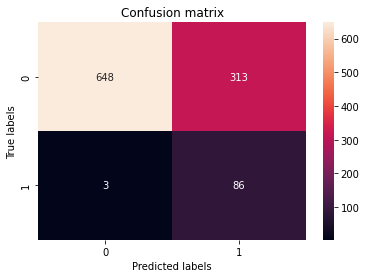

In [49]:
display_diagnostics(y_train, svm_search.predict(X_train))

Balanced accuracy score: 0.7430378129790496
              precision    recall  f1-score   support

           0       0.97      0.70      0.81       412
           1       0.19      0.79      0.31        38

    accuracy                           0.70       450
   macro avg       0.58      0.74      0.56       450
weighted avg       0.91      0.70      0.77       450



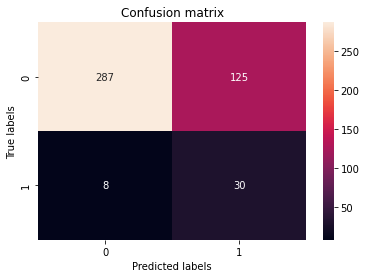

In [50]:
display_diagnostics(y_test, svm_search.predict(X_test))

## KNN

K-Nearest Neighbors is a machine learning algorithm using distance measures to predict unknown labels.

K-Nearest Neighbors has quite an upsetting time complexity, which makes it difficult to apply to large datasets, however we can use it here because our dataset is quite small (1050 observations and 36 features after all transformations are applied)

We'll use grid search to find the best model hyperparameters, adjusting the following:
- Number of neighbors to use (`n_neighbors`)
- Power parameter for the Minkowski metric (`p`), $p=1$ gives L1 (Manhattan distance) metric, $p=2$ gives L2 (Euclidean distance)

In [51]:
ohe_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')
scaler = MinMaxScaler()
transformers = ColumnTransformer([('categorical', ohe_transformer, cat_features),
                                  ('numeric', scaler, num_features)], remainder='passthrough')
knn_pipeline = Pipeline(steps=[('transform', transformers),
                                  ('knn', KNeighborsClassifier())])

In [52]:
knn_param_grid = {'knn__n_neighbors': np.arange(5, 31),
                  'knn__p': [1, 2]}

In [53]:
knn_search = GridSearchCV(knn_pipeline, knn_param_grid, scoring='balanced_accuracy', cv=3)

In [54]:
knn_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('categorical',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['gender',
                                                                          'country',
                                                                          'ethnicity']),
                                                                        ('numeric',
                                                                         MinMaxScaler(),
                                                                         ['personality_neuroticism',
                                                                          'personality_extraversion',
                                                                          'personality_openness',
                                                                          'personality_agreeableness',
                                                                          'pers...
                                                                          'no_of_substances_last_day',
                                                                          'no_of_substances_last_week',
                                                                          'no_of_substances_last_month',
                                                                          'no_of_substances_last_year',
                                                                          'no_of_substances_last_decade',
                                                                          'no_of_substances_decade_ago'])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30]),
                         'knn__p': [1, 2]},
             scoring='balanced_accuracy')

In [55]:
knn_search.best_estimator_

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'country',
                                                   'ethnicity']),
                                                 ('numeric', MinMaxScaler(),
                                                  ['personality_neuroticism',
                                                   'personality_extraversion',
                                                   'personality_openness',
                                                   'personality_agreeableness',
                                                   'personality_conscientiousness',
                                                   'personality_impulsiveness',
                                                   'personality_sensation',
                                                   'no_illicit_drugs',
                                                   'no_of_substances_last_day',
                                                   'no_of_substances_last_week',
                                                   'no_of_substances_last_month',
                                                   'no_of_substances_last_year',
                                                   'no_of_substances_last_decade',
                                                   'no_of_substances_decade_ago'])])),
                ('knn', KNeighborsClassifier(n_neighbors=7, p=1))])

In [56]:
knn_search.best_estimator_.steps[-1][1].get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 1,
 'weights': 'uniform'}

Balanced accuracy score: 0.5704322510493517
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       961
           1       0.72      0.15      0.24        89

    accuracy                           0.92      1050
   macro avg       0.82      0.57      0.60      1050
weighted avg       0.91      0.92      0.90      1050



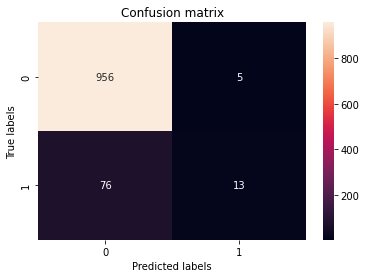

In [57]:
display_diagnostics(y_train, knn_search.predict(X_train))

Balanced accuracy score: 0.5346193152784875
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       412
           1       0.43      0.08      0.13        38

    accuracy                           0.91       450
   macro avg       0.67      0.53      0.54       450
weighted avg       0.88      0.91      0.89       450



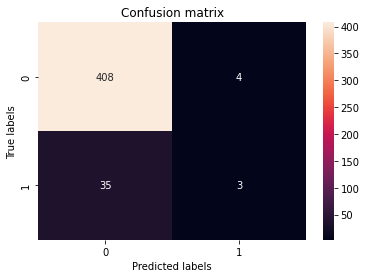

In [58]:
display_diagnostics(y_test, knn_search.predict(X_test))

## Boosting

Boosting is the state of the art method for tabular classification tasks, as evidenced by many Kaggle top scorers.

We'll use `catboost`, an implementation of gradient boosted decision trees (GBDT) algorithm that has built-in categorical feature handling.

In [59]:
# as per catboost documentation, ratio of negative to positive to correct for dataset imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

In [60]:
cb = catboost.CatBoostClassifier(cat_features=cat_features, scale_pos_weight=scale_pos_weight)

In [61]:
cb.fit(X_train, y_train, eval_set=(X_test, y_test))

Learning rate set to 0.032073
0:	learn: 0.6803997	test: 0.6820409	best: 0.6820409 (0)	total: 201ms	remaining: 3m 20s
1:	learn: 0.6589054	test: 0.6654502	best: 0.6654502 (1)	total: 263ms	remaining: 2m 11s
2:	learn: 0.6381468	test: 0.6460098	best: 0.6460098 (2)	total: 319ms	remaining: 1m 45s
3:	learn: 0.6237095	test: 0.6381796	best: 0.6381796 (3)	total: 369ms	remaining: 1m 31s
4:	learn: 0.6178558	test: 0.6322517	best: 0.6322517 (4)	total: 399ms	remaining: 1m 19s
5:	learn: 0.6081189	test: 0.6273060	best: 0.6273060 (5)	total: 457ms	remaining: 1m 15s
6:	learn: 0.5965511	test: 0.6197740	best: 0.6197740 (6)	total: 532ms	remaining: 1m 15s
7:	learn: 0.5825552	test: 0.6097585	best: 0.6097585 (7)	total: 573ms	remaining: 1m 11s
8:	learn: 0.5795105	test: 0.6063773	best: 0.6063773 (8)	total: 619ms	remaining: 1m 8s
9:	learn: 0.5678227	test: 0.6009741	best: 0.6009741 (9)	total: 676ms	remaining: 1m 6s
10:	learn: 0.5570227	test: 0.5948798	best: 0.5948798 (10)	total: 738ms	remaining: 1m 6s
11:	learn: 0.5

Balanced accuracy score: 0.8583813677232284
              precision    recall  f1-score   support

           0       0.99      0.76      0.86       961
           1       0.27      0.96      0.42        89

    accuracy                           0.78      1050
   macro avg       0.63      0.86      0.64      1050
weighted avg       0.93      0.78      0.83      1050



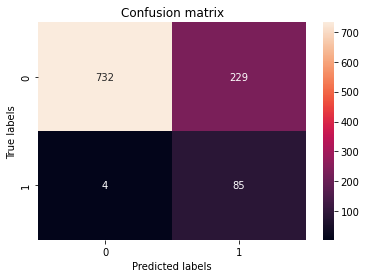

In [62]:
display_diagnostics(y_train, cb.predict(X_train))

Balanced accuracy score: 0.7604113438937148
              precision    recall  f1-score   support

           0       0.97      0.78      0.87       412
           1       0.24      0.74      0.36        38

    accuracy                           0.78       450
   macro avg       0.60      0.76      0.61       450
weighted avg       0.91      0.78      0.82       450



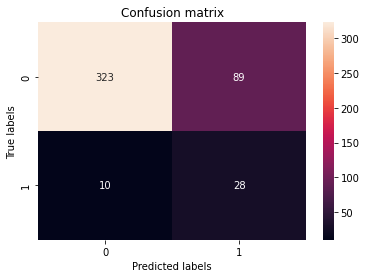

In [63]:
display_diagnostics(y_test, cb.predict(X_test))

In [64]:
sorted(list(zip(cb.feature_names_, cb.feature_importances_)), key=lambda x: x[1])

[('no_illicit_drugs', 0.12414453710554066),
 ('no_of_substances_last_decade', 0.35021416977976844),
 ('no_of_substances_last_month', 0.46375714731718964),
 ('ethnicity', 0.5537231796821408),
 ('consumption_caffeine', 0.695361747788679),
 ('consumption_alcohol', 0.8460816584471449),
 ('personality_impulsiveness', 1.0105185615953114),
 ('no_of_substances_last_week', 1.1606829941547467),
 ('consumption_chocolate', 2.142061525664098),
 ('personality_neuroticism', 2.2280906368763675),
 ('no_of_substances_last_year', 2.424852519131943),
 ('country', 2.6444288514731342),
 ('personality_openness', 2.9937202917048134),
 ('personality_extraversion', 3.1398207643611284),
 ('education', 3.2194217212527754),
 ('personality_conscientiousness', 3.715514853181302),
 ('no_of_substances_decade_ago', 4.087690967322063),
 ('gender', 4.196827728084061),
 ('no_of_substances_last_day', 5.207230805384868),
 ('personality_sensation', 5.799595981247523),
 ('personality_agreeableness', 6.176823511112274),
 ('con

In [65]:
feature_importance_df = pd.DataFrame({'feature_name': cb.feature_names_, 'feature_importance': cb.feature_importances_}).sort_values('feature_importance', ascending=False)

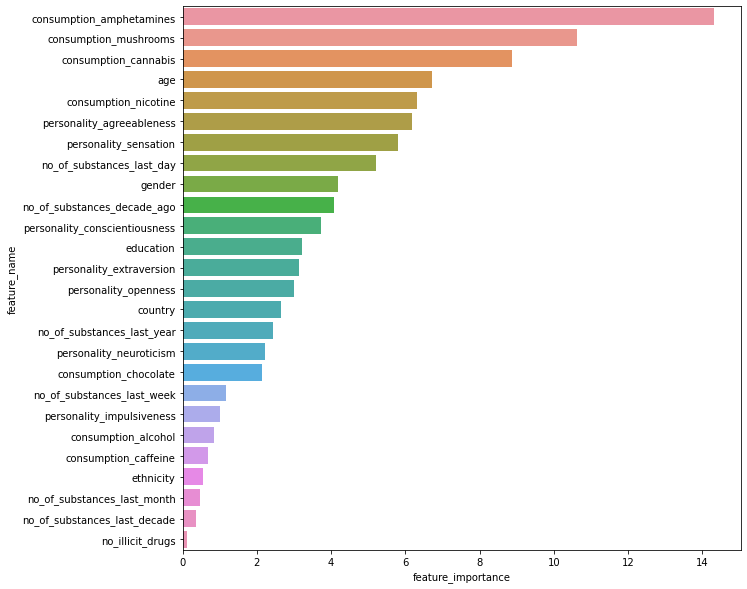

In [66]:
plt.figure(figsize=(10, 10))
sns.barplot(y='feature_name', x='feature_importance', data=feature_importance_df, orient='h')
plt.show()

## Out-of-sample prediction

Logistic regression showed the best balanced accuracy score on the holdout set, so we'll use it to make predictions for the out-of-sample observations

Expected balanced accuracy: 0.72

In [67]:
logreg_best_params = logreg_search.best_params_
print(logreg_best_params)

{'logreg__C': 0.012742749857031334, 'logreg__penalty': 'l2'}


In [68]:
ohe_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')
scaler = MinMaxScaler()
transformers = ColumnTransformer([('categorical', ohe_transformer, cat_features),
                                  ('numeric', scaler, num_features)], remainder='passthrough')
best_logreg_pipeline = Pipeline(steps=[('transform', transformers),
                                  ('logreg', LogisticRegression(solver='liblinear',
                                                                class_weight='balanced',
                                                                C=logreg_best_params['logreg__C'],
                                                                penalty=logreg_best_params['logreg__penalty']))])

In [69]:
best_logreg_pipeline.fit(X, y)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'country',
                                                   'ethnicity']),
                                                 ('numeric', MinMaxScaler(),
                                                  ['personality_neuroticism',
                                                   'personality_extraversion',
                                                   'personality_openness',
                                                   'personality_agreeableness',
                                                   'personality_conscientiousness',
                                                   'personality_impulsiveness',
                                                   'personality_sensation',
                                                   'no_illicit_drugs',
                                                   'no_of_substances_last_day',
                                                   'no_of_substances_last_week',
                                                   'no_of_substances_last_month',
                                                   'no_of_substances_last_year',
                                                   'no_of_substances_last_decade',
                                                   'no_of_substances_decade_ago'])])),
                ('logreg',
                 LogisticRegression(C=0.012742749857031334,
                                    class_weight='balanced',
                                    solver='liblinear'))])

In [70]:
drugs_test_df = pd.read_csv('data/drugs_test.csv')

In [71]:
output_df = pd.DataFrame()
output_df['id'] = drugs_test_df['id']

In [72]:
drugs_test_df.head()

,id,age,gender,education,country,ethnicity,personality_neuroticism,personality_extraversion,personality_openness,personality_agreeableness,personality_conscientiousness,personality_impulsiveness,personality_sensation,consumption_alcohol,consumption_amphetamines,consumption_caffeine,consumption_cannabis,consumption_chocolate,consumption_mushrooms,consumption_nicotine
0,test_0001,18-24,female,"Some college or university, no certificate or ...",USA,Mixed-Black/Asian,37.7,74.2,60.2,45.6,40.6,63.0,71.1,used in last day,never used,used in last day,used in last week,used in last day,used in last decade,used in last day
1,test_0002,45-54,male,Doctorate degree,USA,Other,62.3,47.6,73.1,43.5,60.9,56.5,71.1,used in last day,used over a decade ago,used in last day,used in last decade,used in last month,never used,used in last decade
2,test_0003,45-54,female,Professional certificate/ diploma,USA,Mixed-Black/Asian,56.1,52.6,34.9,58.5,58.4,56.5,38.8,used in last week,never used,used in last day,never used,used in last day,never used,never used
3,test_0004,35-44,male,"Some college or university, no certificate or ...",Australia,Mixed-Black/Asian,71.8,50.1,45.7,39.0,42.4,63.0,46.6,used in last decade,never used,used in last day,used in last day,used in last week,never used,used in last day
4,test_0005,35-44,male,Left school at 16 years,USA,Mixed-Black/Asian,62.3,41.2,19.2,39.0,22.3,42.8,38.8,used in last decade,used in last day,used in last day,used in last day,used in last week,used over a decade ago,used in last day


In [73]:
drugs_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             385 non-null    object 
 1   age                            385 non-null    object 
 2   gender                         385 non-null    object 
 3   education                      385 non-null    object 
 4   country                        385 non-null    object 
 5   ethnicity                      385 non-null    object 
 6   personality_neuroticism        385 non-null    float64
 7   personality_extraversion       385 non-null    float64
 8   personality_openness           385 non-null    float64
 9   personality_agreeableness      385 non-null    float64
 10  personality_conscientiousness  385 non-null    float64
 11  personality_impulsiveness      385 non-null    float64
 12  personality_sensation          385 non-null    flo

Applying the same transformations to data as we do in training: feature engineering and cleaning

In [74]:
drugs_test_df = feature_engineering(drugs_test_df)
drugs_test_df = clean_df(drugs_test_df, train_data=False)

In [75]:
drugs_test_df

,age,gender,education,country,ethnicity,personality_neuroticism,personality_extraversion,personality_openness,personality_agreeableness,personality_conscientiousness,...,consumption_chocolate,consumption_mushrooms,consumption_nicotine,no_illicit_drugs,no_of_substances_last_day,no_of_substances_last_week,no_of_substances_last_month,no_of_substances_last_year,no_of_substances_last_decade,no_of_substances_decade_ago
0,0,female,4,USA,Mixed-Black/Asian,37.7,74.2,60.2,45.6,40.6,...,6,2,6,0,2,1,0,0,1,0
1,3,male,8,USA,Other,62.3,47.6,73.1,43.5,60.9,...,4,0,2,0,1,0,0,0,2,1
2,3,female,5,USA,Mixed-Black/Asian,56.1,52.6,34.9,58.5,58.4,...,6,0,0,1,0,1,0,0,0,0
3,2,male,4,Australia,Mixed-Black/Asian,71.8,50.1,45.7,39.0,42.4,...,5,0,6,0,2,0,0,0,1,0
4,2,male,1,USA,Mixed-Black/Asian,62.3,41.2,19.2,39.0,22.3,...,5,1,6,0,3,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,2,male,6,USA,Mixed-Black/Asian,46.2,59.7,37.2,54.2,71.1,...,5,0,2,1,0,1,0,0,1,0
381,1,male,5,USA,Mixed-Black/Asian,49.2,74.2,52.7,51.9,44.1,...,6,0,2,0,1,0,0,0,2,1
382,2,male,7,USA,Mixed-Black/Asian,62.3,85.5,55.3,76.2,51.8,...,0,0,6,0,1,1,0,0,0,1
383,5,male,7,USA,Mixed-Black/Asian,53.4,33.3,45.7,43.5,53.7,...,5,0,1,1,1,0,0,0,0,1


In [76]:
X_predict = drugs_test_df[cat_features + num_features + ordinal_features]

In [77]:
output_df['consumption_cocaine_last_month'] = pd.Series(best_logreg_pipeline.predict(X_predict)).replace({0: 'No', 1: 'Yes'})

In [78]:
output_df

,id,consumption_cocaine_last_month
0,test_0001,Yes
1,test_0002,No
2,test_0003,No
3,test_0004,No
4,test_0005,Yes
...,...,...
380,test_0381,No
381,test_0382,No
382,test_0383,No
383,test_0384,No


In [79]:
output_df.to_csv('classification_predictions.csv', index=False)